# 1qbit-matplotlib-style
Matplotlib style file following [1QBit](http://www.1qbit.com)'s brand policies.

_Note that this is probably not complete.  There are plot types that are not accounted for.  Please feel free to make a pull request with updates._


## Use:
Install this package, e.g. 
```bash
pip install plot1qbit
```

Import the `plot1qbit` package prior to plotting, but after importing matplotlib.

```python
import matplotlib.pyplot as plt
import plot1qbit
```


### Font

1QBit's brand font is Brandon Text.  This is a commercial font and thus cannot be distributed.  If you have Brandon Text installed on your computer through some other means, this package will pick it up and use it.  You may need to delete your matplotlib cache first though:
```bash 
rm -r $HOME/.cache/matplotlib
```
If you're an employee of 1QBit, a zip file containing these fonts can be found in the company Google Drive.

To install fonts on Ubuntu (e.g. for plotting with a Jupyter notebook running on Google Cloud), place the otf font files in `$HOME/.local/share/fonts` and then run

```bash
fc-cache -f -v
rm -r $HOME/.cache/matplotlib
```
to rebuild the font cache and force matplotlib to rebuild its internal cache next time it's needed.


## Examples
Below are several examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import plot1qbit

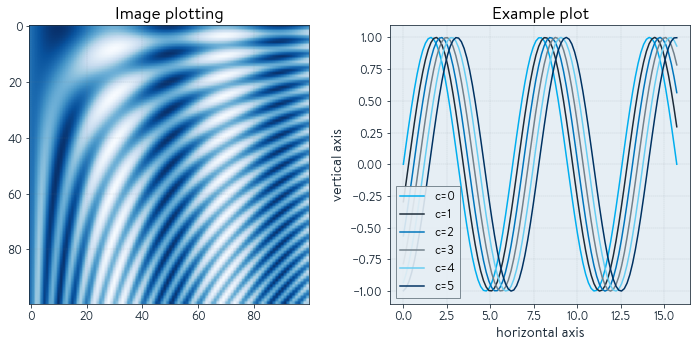

In [2]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
xs = np.linspace(0,5*np.pi, num=100)

X,Y = np.meshgrid(xs,xs)
axs[0].imshow(np.sin(X)+np.cos(0.5*Y*X))
axs[0].set_title("Image plotting")
for c in range(6):
    axs[1].plot(xs, np.sin(xs - 0.3*c), label=f"c={c}")
axs[1].legend()
axs[1].set_title("Example plot")
axs[1].set_ylabel("vertical axis")
axs[1].set_xlabel("horizontal axis")

plt.tight_layout()
fig.show()

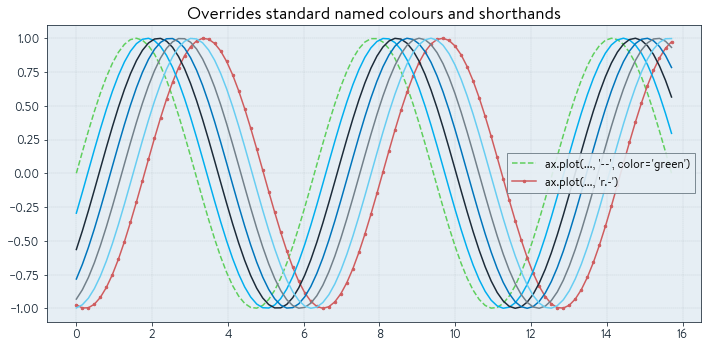

In [3]:
fig, axs = plt.subplots(1,1,figsize=(10,5))
xs = np.linspace(0,5*np.pi, num=100)


axs.plot(xs, np.sin(xs), '--', label='ax.plot(..., \'--\', color=\'green\')', color='green')
axs.plot(xs, np.sin(xs-0.3*6), 'r.-', label='ax.plot(..., \'r.-\')')

for c in range(1,6):
    axs.plot(xs, np.sin(xs - 0.3*c))

axs.legend()
axs.set_title("Overrides standard named colours and shorthands")

plt.tight_layout()
fig.show()

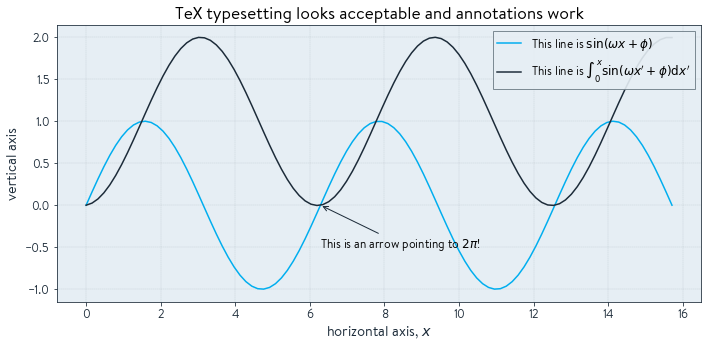

In [4]:
fig, axs = plt.subplots(1,1,figsize=(10,5))
xs = np.linspace(0,5*np.pi, num=100)
axs.plot(xs, np.sin(xs), label="This line is $\sin(\omega x + \phi)$")
axs.plot(xs, np.cumsum(np.sin(xs))*(xs[1]-xs[0]), label=r"This line is $\int_0^x\sin(\omega x' + \phi)\mathrm{d}x'$")
axs.set_ylabel("vertical axis")
axs.set_xlabel("horizontal axis, $x$")
axs.legend()
axs.set_title("TeX typesetting looks acceptable and annotations work")

axs.annotate("This is an arrow pointing to $2\pi$!", (2*np.pi,0), xytext=(2.0*np.pi,-0.5), arrowprops=dict(arrowstyle='->') )

plt.tight_layout()
fig.show()

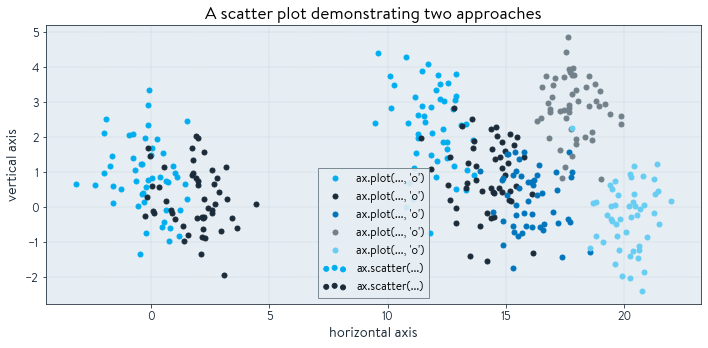

In [5]:
fig, axs = plt.subplots(1,1,figsize=(10,5))

for i in range(2):
    axs.scatter(np.random.randn(50)+(i*2), np.random.randn(50)+np.random.randint(0,4,1), label="ax.scatter(...)")

for i in range(6,11):
    axs.plot(np.random.randn(50)+(i*2), np.random.randn(50)+np.random.randint(0,4,1), 'o', label="ax.plot(..., 'o')")


axs.set_ylabel("vertical axis")
axs.set_xlabel("horizontal axis")
axs.legend()
axs.set_title("A scatter plot demonstrating two approaches")


plt.tight_layout()
fig.show()

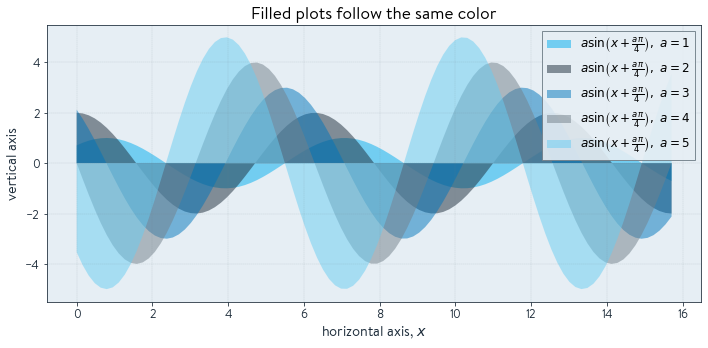

In [6]:
fig, axs = plt.subplots(1,1,figsize=(10,5))
xs = np.linspace(0,5*np.pi, num=100)

for a in range(1,6):
    axs.fill_between(xs, a*np.sin(xs+a*np.pi/4), alpha=0.5, label=r"$a \sin\left(x + \frac{a\pi}{4}\right),\ $" + f"$a={{{a}}}$")

axs.set_ylabel("vertical axis")
axs.set_xlabel("horizontal axis, $x$")
axs.legend()
axs.set_title("Filled plots follow the same color")

plt.tight_layout()
fig.show()

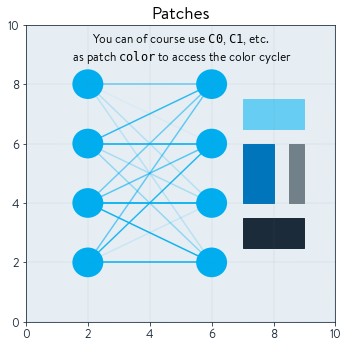

In [7]:
fig, axs = plt.subplots(1,1,figsize=(5,5))

from matplotlib.patches import Circle, Rectangle
from matplotlib.lines import Line2D


for x in [2,6]:
    for y in range(2,10,2):
        axs.add_artist(Circle((x,y), 0.5))
        for x2 in [2,6]:
            for y2 in range(y,10,2):
                if x!=x2:
                    axs.add_artist(Line2D((x,x2),(y,y2), alpha=np.random.rand()))


axs.add_artist(Rectangle((7,2.5), width=2, height=1, color='C1'))
axs.add_artist(Rectangle((7,4), width=1, height=2, color='C2'))
axs.add_artist(Rectangle((8.5,4), width=0.5, height=2, color='C3'))
axs.add_artist(Rectangle((7,6.5), width=2, height=1, color='C4'))

axs.text(5, 9.75, "You can of course use $\\tt{C0}$, $\\tt{C1}$, etc.\n as patch $\\tt{color}$ to access the color cycler", color='black', va='top', ha='center')
    
axs.set_title("Patches")
    
axs.set_ylim(0,10)
axs.set_xlim(0,10)


plt.tight_layout()
fig.show()